In [1]:
import spacy

# spacy english model (large)
nlp = spacy.load('en_core_web_lg')

In [7]:
import sys
sys.path.insert(0,'..')
from part2.search_yt import search_yt

In [110]:
search = 'building stairs for house'
ids, texts = search_yt(search, 5)

In [119]:
ids

['UFIqiwtaAYA', 'n_8nz6fLxS0', 'zPBjcL3zo9g', 'P2JAwm_rZZ4', 'FMLIFJgz3CE']

In [120]:
texts[4]

[{'text': 'when your house has a second-story on it',
  'start': 1.25,
  'duration': 4.15,
  'sim': 0.7071072910347969},
 {'text': 'you have to build a plate of stairs so',
  'start': 3.72,
  'duration': 4.919,
  'sim': 0.7655953249246235},
 {'text': 'we will assure you how to build a simple',
  'start': 5.4,
  'duration': 5.46,
  'sim': 0.6368840672834516},
 {'text': 'set of straight fly stairs just like',
  'start': 8.639,
  'duration': 4.221,
  'sim': 0.7301042879520256},
 {'text': 'this one we have here in the small model',
  'start': 10.86,
  'duration': 4.229,
  'sim': 0.6358371910733882},
 {'text': "it's going to go right up here in this",
  'start': 12.86,
  'duration': 6.73,
  'sim': 0.6340175714516108},
 {'text': "hole let's call the stairwell now to",
  'start': 15.089,
  'duration': 6.03,
  'sim': 0.6991235051158006},
 {'text': 'begin that process you have to make a',
  'start': 19.59,
  'duration': 4.08,
  'sim': 0.6087325921219934},
 {'text': 'measurement book your tape o

In [113]:
def similarity_calc(search_words, subtitles):
    search = nlp(search_words)
    
    array_size = 0
    for i in range(len(subtitles)):
        array_size += len(subtitles[i])
            
    print('measure the similarity:')
    p = 1
    for i in range(len(subtitles)):
        for j in range(len(subtitles[i])):
            subtitles[i][j]['sim'] = search.similarity(nlp(subtitles[i][j]['text'].replace('\n',' ').replace('\xa0',' ').replace('  ', ' ')))
            print('\r{:2.1f}%'.format(p / array_size * 100), end='')
            p += 1
    print()
    return subtitles

In [114]:
texts = similarity_calc(search, texts)

measure the similarity:
100.0%


In [107]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 5]
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [73]:
def make_plot_data(subtitles):
    X = []
    Y = []
    for i in range(len(subtitles)):
        xx = []
        yy = []
        for j in range(len(subtitles[i])):
            xx.append(subtitles[i][j]['start'])
            yy.append(subtitles[i][j]['sim'])
        X.append(xx)
        Y.append(yy)
    return X, Y

In [115]:
X, Y = make_plot_data(texts)

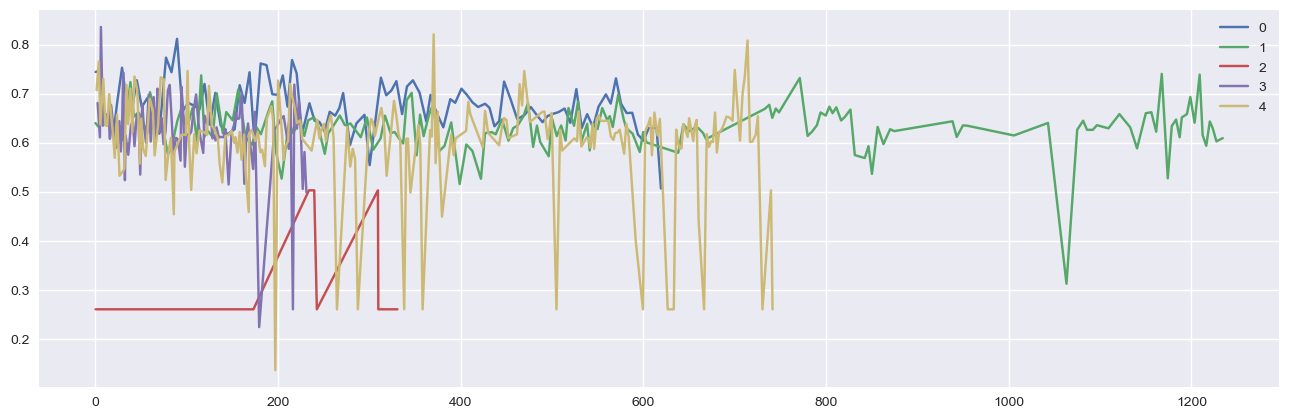

In [118]:
plt.figure(figsize=(16,5))
for i in range(len(X)):
    plt.plot(X[i], Y[i], label=i)
plt.legend()
plt.show()

In [33]:
words = 'dog cat horse ball'
tokens = nlp(words)

for token in tokens:
    # Printing the following attributes of each token.
    # text: the word string, has_vector: if it contains
    # a vector representation in the model, 
    # vector_norm: the algebraic norm of the vector,
    # is_oov: if the word is out of vocabulary.
    print(token.text, token.has_vector, token.vector_norm, token.is_oov,'|',token.similarity(tokens))
  
token1, token2 = tokens[0], tokens[1]
  
print("Similarity:", token1.similarity(token2))
print(cosineSimilarity(tokens[0].vector, tokens[2].vector))

dog True 7.0336733 False | 0.8905416137386603
cat True 6.6808186 False | 0.8196947233396737
horse True 6.760544 False | 0.7755440202256019
ball True 6.874591 False | 0.6057424500868062
Similarity: 0.80168545
0.6246275901794434


In [37]:
tokens.similarity(nlp('creature'))

0.41217241988421455

___________________

In [1]:
from parser_l3 import you_parse
from filter_2 import filter_2
from yt_search_l1 import search_1

In [2]:
s_1 = search_1('how to brake wall')

In [3]:
ids = [x['id'] for x in s_1]

In [4]:
yt_obs = you_parse(ids[:5])

Parsing donef 5


In [11]:
def filter_2(search_sentence, yt_objects):
    # may be: % of relevance; recomendation in which part more relevance for search
    predictions = []

    tokens = nlp(search_sentence)

    # parsing info from yt_objects
    y_keywords = []
    y_views = []
    y_title = []
    y_author = []
    y_description = []   # replace '\n'
    y_length = []
    y_publish_date = []
    y_rating = []
    spacy_similarity = []

    for i, obj in enumerate(yt_objects):
        y_keywords.append(obj.keywords) # list
        y_views.append(obj.views)
        y_title.append(obj.title)
        y_author.append(obj.author)
        y_description.append(obj.description.replace('\n', ' '))
        y_length.append(obj.length)
        y_publish_date.append(obj.publish_date)  # datetime
        y_rating.append(obj.rating)

            # We can add here weights
        ss = tokens.similarity(nlp(' '.join(y_keywords[-1])))
        ss += tokens.similarity(nlp(y_title[-1]))
        ss += tokens.similarity(nlp(y_author[-1]))
        ss += tokens.similarity(nlp(y_description[-1]))

        spacy_similarity.append(ss)
        obj.similarity = ss
        print(obj.author)
        print(ss)


    return yt_objects

In [12]:
yt_obs_n = filter_2('how to brake wall', yt_obs)

Lowe's Home Improvement
3.059274095651319
HouseImprovements
2.3828411050632523
AllYouWannaSee Official
2.6295460970384528
Manoj Jangid InteriorLane
2.264071499328746
Our Build
2.8638803542532822


<ipython-input-11-4e850ed002b2>:31: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  ss += tokens.similarity(nlp(y_author[-1]))


In [13]:
yt_obs_n[0].similarity

3.059274095651319

In [17]:
for x in sorted(yt_obs_n, key=lambda x: x.similarity, reverse=True):
    print(x.similarity)

3.059274095651319
2.8638803542532822
2.6295460970384528
2.3828411050632523
2.264071499328746
